In [2]:
%matplotlib inline

import os
import pandas as pd
import nilearn

from nilearn import plotting
from nilearn import datasets
from nilearn.image import mean_img

# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

/Users/home/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
os.getcwd()

'/Users/home/Documents/GitHub/MVPA-speech_project'

In [4]:
# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: {}'.format(datasets.MNI152_FILE_PATH))

Path to MNI152 template: /Users/home/.local/lib/python3.8/site-packages/nilearn/datasets/data/avg152T1_brain.nii.gz


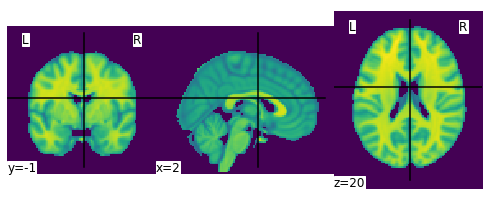

In [5]:
plotting.plot_img(datasets.MNI152_FILE_PATH)

/Users/home/.local/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


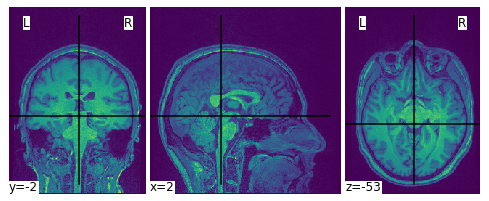

In [6]:
plotting.plot_img('/Users/home/Documents/BIDS/sub-0001/ses-001/anat/sub-0001_ses-001_run-01_T1w.nii.gz')

In [6]:
from nilearn import image
smooth_anat_img = image.smooth_img(datasets.MNI152_FILE_PATH, fwhm=6)

# While we are giving a file name as input, the function returns
# an in-memory object:
print(smooth_anat_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8186.02
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : mni
sform_cod

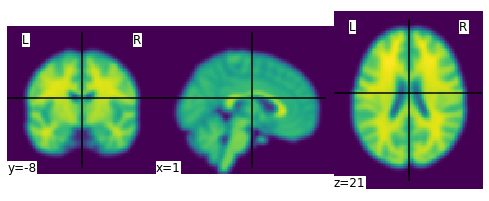

In [7]:
plotting.plot_img(smooth_anat_img)

In [8]:
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()

# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data

First subject functional nifti images (4D) are at: /Users/home/nilearn_data/haxby2001/subj2/bold.nii.gz


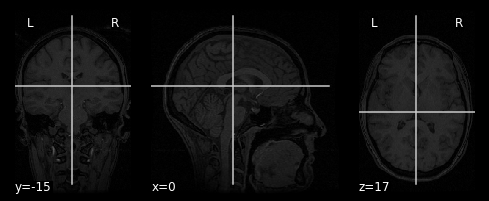

In [9]:
anat_filename=haxby_dataset.anat[0]
plotting.plot_anat(anat_filename)


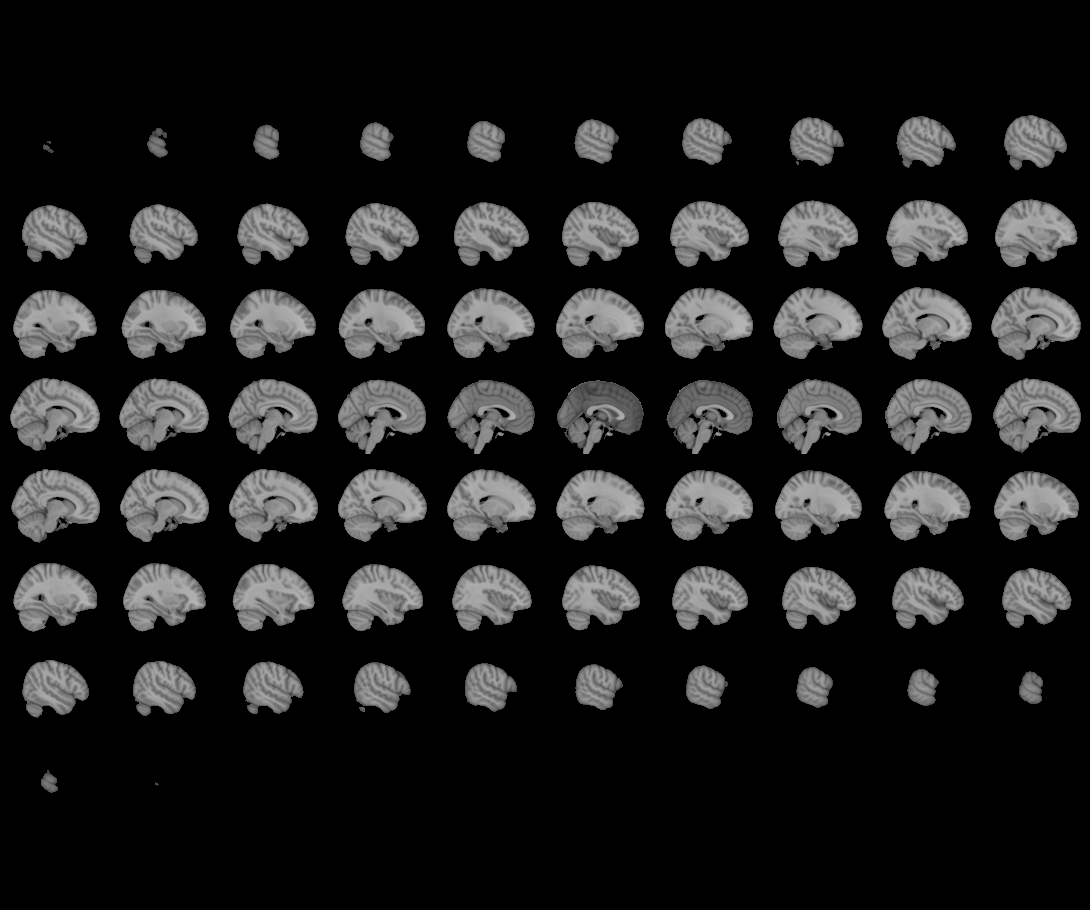
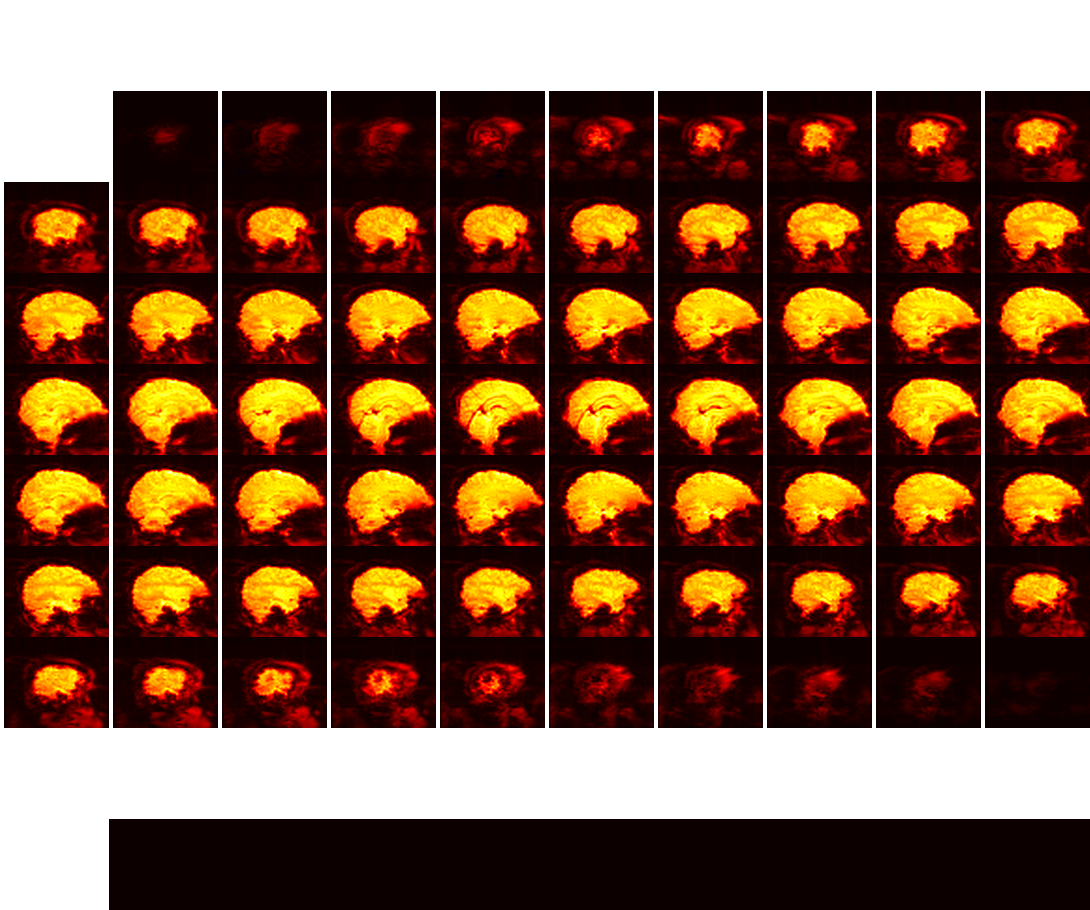

In [10]:
plotting.view_img(mean_img(fmri_filename))

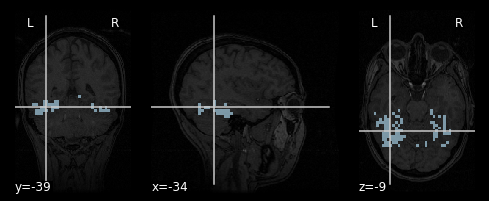

In [11]:
mask_filename = haxby_dataset.mask_vt[0]

# Let's visualize it, using the subject's anatomical image as a
# background
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                  cmap='Paired')

In [13]:
help (nilearn.image)

Help on package nilearn.image in nilearn:

NAME
    nilearn.image

DESCRIPTION
    Mathematical operations working on Niimg-like objects like a (3+)D block of
    data, and an affine.

PACKAGE CONTENTS
    image
    resampling
    tests (package)

FUNCTIONS
    clean_img(imgs, sessions=None, detrend=True, standardize=True, confounds=None, low_pass=None, high_pass=None, t_r=None, ensure_finite=False, mask_img=None)
        Improve SNR on masked fMRI signals.
        
        This function can do several things on the input signals, in
        the following order:
        
        - detrend
        - low- and high-pass filter
        - remove confounds
        - standardize
        
        Low-pass filtering improves specificity.
        
        High-pass filtering should be kept small, to keep some sensitivity.
        
        Filtering is only meaningful on evenly-sampled signals.
        
        According to Lindquist et al. (2018), removal of confounds will be done
        orthog